Lo primero que vamos hacer es traer las paqueterias de Pymatgen y de ahi un submodulo que se llama ext, en este esta matploj y a su vez MPRester, es con esta clase que se va a obtener los datos de las perovskitas.

In [1]:
import pymatgen
from mp_api.client import MPRester

/home/bokhimi/.conda/envs/cgcnn/lib/python3.10/site-packages/pymatgen/analysis/phase_diagram.py:26: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [2]:
from pandas import DataFrame
from pandas import read_csv
import pandas as pd
import ast

Primero vamos a tomar los elementos de la base de datos que hicieron los del articulo en el cual me base para la tesis.
El archivo que compartieron ellos, se llama combine. Lo subimos con read_csv y vemos el nombre de las columnas que tiene

In [22]:
df1 = read_csv('combine.csv')
df1.columns

Index(['formula', 'z_mean', 'z_std', 'grp_mean', 'grp_std', 'row_mean',
       'row_std', 'x_mean', 'x_std', 'av_ionrad_mean', 'av_ionrad_std',
       'atom_rad_mean', 'atom_rad_std', 'atom_mass_mean', 'atom_mass_std',
       'cal_atom_rad_mean', 'cal_atom_rad_std', 'cov_rad_mean', 'cov_rad_std',
       'bp_mean', 'bp_std', 'rho_mean', 'rho_std', 'mp_mean', 'mp_std',
       'mol_vol_mean', 'mol_vol_std', 'k_mean', 'k_std', 'vdw_mean', 'vdw_std',
       'iupac_mean', 'iupac_std', 'val_mean', 'val_std', 'heat_fus_mean',
       'heat_fus_std', 'heat_vap_mean', 'heat_vap_std', 'spec_heat_mean',
       'spec_heat_std', 'ea_mean', 'ea_std', 'ie_mean', 'ie_std', 'p_mean',
       'p_std', 'pet_mn_mean', 'pet_mn_std', 'mn_mean', 'mn_std', 'rsp_mean',
       'rsp_std', 'av_rsp_mean', 'av_rsp_std', 'gtf', 'of', 'rho', 'Ehull',
       'Ef', 'Eg'],
      dtype='object')

Vemos solamente la columna 'formula'

In [23]:
df1['formula']

0         LaSiAs3
1         CsAuBr3
2         RbAuBr3
3         CsCaBr3
4          KCaBr3
          ...    
1448     Y2NiRuO6
1449    Yb2MgTiO6
1450     Zn2BiPO6
1451    In2GaBiS6
1452    Yb2PrDyS6
Name: formula, Length: 1453, dtype: object

Lo que hacemos ahora es verificar como es que presenta los elementos, aqui vemos al segundo elemento, justo lo muestra como un str, esto nos interesa, pues es de esta manera que mpr reconoce la formula

In [24]:
for i in range(len(df1)):
    print(df1['formula'][i])

LaSiAs3
CsAuBr3
RbAuBr3
CsCaBr3
KCaBr3
RbCaBr3
CsCdBr3
RbCdBr3
TlCdBr3
CrCoBr3
RbCoBr3
CsCrBr3
CsCuBr3
CsDyBr3
KDyBr3
RbDyBr3
CsEuBr3
CsFeBr3
InFeBr3
KFeBr3
TlFeBr3
LiGaBr3
CsGeBr3
RbGeBr3
CsHgBr3
CaInBr3
CdInBr3
KInBr3
MgInBr3
MnInBr3
CsMgBr3
CsMnBr3
KMnBr3
RbMnBr3
CsNiBr3
RbNiBr3
CsPbBr3
AlSBr3
NbSeBr3
CsSmBr3
CsSnBr3
CsSrBr3
NbTeBr3
CsTiBr3
KTiBr3
RbTiBr3
CsTmBr3
KTmBr3
RbTmBr3
CsVBr3
RbVBr3
CsYbBr3
KYbBr3
RbYbBr3
CsAgCl3
CsAuCl3
SnCCl3
CsCaCl3
KCaCl3
CsCdCl3
KCdCl3
RbCdCl3
TlCdCl3
CsCoCl3
RbCoCl3
TlCoCl3
CsCrCl3
RbCrCl3
CsCuCl3
KCuCl3
RbCuCl3
CsEuCl3
RbEuCl3
CsFeCl3
KFeCl3
RbFeCl3
LiGaCl3
CsGeCl3
RbGeCl3
CsHgCl3
NaHgCl3
CsMgCl3
KMgCl3
RbMgCl3
CsMnCl3
KMnCl3
NaMnCl3
RbMnCl3
CaNCl3
CdNCl3
FeNCl3
HgNCl3
MnNCl3
MoNCl3
NiNCl3
VNCl3
CsNiCl3
KNiCl3
RbNiCl3
TlNiCl3
CsPbCl3
RbPbCl3
CsPdCl3
CsScCl3
RbScCl3
NbSeCl3
CsSmCl3
CsSnCl3
CsSrCl3
RbSrCl3
KTcCl3
CsTiCl3
KTiCl3
RbTiCl3
MgTlCl3
MnTlCl3
CsTmCl3
CsVCl3
KVCl3
RbVCl3
TlVCl3
CsYbCl3
CoAgF3
CsAgF3
KAgF3
MgAgF3
MnAgF3
NiAgF3
RbAgF3
ZnAgF3
CsBe

Ahora inicializamos MPRester, conectandonos con una clave, la cual se llama MAPI_KEY. Despues inicializamos un objeto, el que llamamos mpr

In [25]:
MAPI_KEY = "aqyJJAtgSbixwhLggLCzGfPNYncOwlge"  # Materials API key
mpr = MPRester(MAPI_KEY) 

/home/bokhimi/.conda/envs/cgcnn/lib/python3.10/site-packages/mp_api/client/mprester.py:141: UserWarning: mpcontribs-client not installed. Install the package to query MPContribs data, or construct pourbaix diagrams: 'pip install mpcontribs-client'
  warnings.warn("mpcontribs-client not installed. "


Aqui podemos obtener un poco de ayuda de que se le puede hacer a este objeto llamado mpr

In [26]:
help(mpr)

Help on MPRester in module mp_api.client.mprester object:

class MPRester(builtins.object)
 |  MPRester(api_key=None, endpoint='https://api.materialsproject.org/', notify_db_version=False, include_user_agent=True, monty_decode: bool = True, use_document_model: bool = True)
 |  
 |  Access the new Materials Project API.
 |  
 |  Methods defined here:
 |  
 |  __enter__(self)
 |      Support for "with" context.
 |  
 |  __exit__(self, exc_type, exc_val, exc_tb)
 |      Support for "with" context.
 |  
 |  __getattr__(self, attr)
 |  
 |  __init__(self, api_key=None, endpoint='https://api.materialsproject.org/', notify_db_version=False, include_user_agent=True, monty_decode: bool = True, use_document_model: bool = True)
 |      Args:
 |          api_key (str): A String API key for accessing the MaterialsProject
 |              REST interface. Please obtain your API key at
 |              https://next-gen.materialsproject.org/api. If this is None,
 |              the code will check if the

Lo siguiente es hacer un ciclo for, para obtener las propiedades de los compuesto, esto se hace pidiendoselos a materials project.
Utilizamos la funcion .get_data, que tiene entradas: df['formula][j] que lo que es, es un str, que le dice que compuesto es, despues viene 'vasp' que la documentacion menciona que es el tipo de dato que da, hay otra opcion de poner en lugar de vasp, poner exp, pero la diferencia visible es que no imprime el valor, y por ultimo '' que lo que significa es que nos de toda la informacion que tienen de ese compuesto.
Hay veces que un compuesto tiene mas de una sola plantilla de informacion, por lo que hacemos un for adentro, por si hay mas de uno y asi poder guardarlo en la lista y poder despues manipular mejor esta lista, la cual llamamos L.

In [27]:
L = []
for j in range(10):
    D = mpr.summary.search(formula=df1['formula'][j], all_fields=True)
    for i in range(len(D)):
        L.append(D[i])
#cambiar .get_data por .summary.search()

Retrieving SummaryDoc documents:   0%|          | 0/2 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/2 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/2 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/3 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/4 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/2 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Vemos como se guardo la informacion en la lista L.

In [28]:
L[0].band_gap

0.0

In [29]:
L

[MPDataDoc<SummaryDoc>(
 builder_meta=EmmetMeta(emmet_version='0.36.9', pymatgen_version='2022.4.19', pull_request=None, database_version=None, build_date=datetime.datetime(2022, 10, 5, 21, 35, 45, 261000)),
 nsites=40,
 elements=[Element As, Element La, Element Si],
 nelements=3,
 composition=Comp: La8 Si8 As24,
 composition_reduced=Comp: La1 Si1 As3,
 formula_pretty='LaSiAs3',
 formula_anonymous='ABC3',
 chemsys='As-La-Si',
 volume=959.6521599088859,
 density=5.423012944296219,
 density_atomic=23.99130399772215,
 symmetry=SymmetryData(crystal_system=<CrystalSystem.ortho: 'Orthorhombic'>, symbol='Pbca', number=61, point_group='mmm', symprec=0.1, version='1.16.2'),
 property_name='summary',
 material_id=MPID(mp-648984),
 deprecated=False,
 deprecation_reasons=None,
 last_updated=datetime.datetime(2022, 10, 5, 21, 35, 45, 261000),
 origins=[],
 warnings=[],
 structure=Structure Summary
 Lattice
     abc : 5.966752 6.030712 26.669033
  angles : 90.0 90.0 90.0
  volume : 959.6521599088859

Vemos cuantos elementos guardo en esta lista

In [37]:
d = []
for i in range(len(L)):
    d.append(vars(L[i]))

In [38]:
len(L)

19

In [39]:
properties = vars(L[0]).keys()
properties

dict_keys(['nsites', 'elements', 'nelements', 'composition', 'composition_reduced', 'formula_pretty', 'formula_anonymous', 'chemsys', 'volume', 'density', 'density_atomic', 'symmetry', 'property_name', 'material_id', 'deprecated', 'deprecation_reasons', 'last_updated', 'origins', 'warnings', 'structure', 'task_ids', 'uncorrected_energy_per_atom', 'energy_per_atom', 'formation_energy_per_atom', 'energy_above_hull', 'is_stable', 'equilibrium_reaction_energy_per_atom', 'decomposes_to', 'xas', 'grain_boundaries', 'band_gap', 'cbm', 'vbm', 'efermi', 'is_gap_direct', 'is_metal', 'es_source_calc_id', 'bandstructure', 'dos', 'dos_energy_up', 'dos_energy_down', 'is_magnetic', 'ordering', 'total_magnetization', 'total_magnetization_normalized_vol', 'total_magnetization_normalized_formula_units', 'num_magnetic_sites', 'num_unique_magnetic_sites', 'types_of_magnetic_species', 'k_voigt', 'k_reuss', 'k_vrh', 'g_voigt', 'g_reuss', 'g_vrh', 'universal_anisotropy', 'homogeneous_poisson', 'e_total', 'e_

In [40]:
print(d)

[{'nsites': 40, 'elements': [Element As, Element La, Element Si], 'nelements': 3, 'composition': Comp: La8 Si8 As24, 'composition_reduced': Comp: La1 Si1 As3, 'formula_pretty': 'LaSiAs3', 'formula_anonymous': 'ABC3', 'chemsys': 'As-La-Si', 'volume': 959.6521599088859, 'density': 5.423012944296219, 'density_atomic': 23.99130399772215, 'symmetry': SymmetryData(crystal_system=<CrystalSystem.ortho: 'Orthorhombic'>, symbol='Pbca', number=61, point_group='mmm', symprec=0.1, version='1.16.2'), 'property_name': 'summary', 'material_id': MPID(mp-648984), 'deprecated': False, 'deprecation_reasons': None, 'last_updated': datetime.datetime(2022, 10, 5, 21, 35, 45, 261000), 'origins': [], 'warnings': [], 'structure': Structure Summary
Lattice
    abc : 5.966752 6.030712 26.669033
 angles : 90.0 90.0 90.0
 volume : 959.6521599088859
      A : 5.966752 0.0 0.0
      B : 0.0 6.030712 0.0
      C : 0.0 0.0 26.669033
    pbc : True True True
PeriodicSite: La (0.0143, 6.0302, 2.4250) [0.0024, 0.9999, 0.0

In [42]:
df = pd.DataFrame(d, columns = properties)
df

,nsites,elements,nelements,composition,composition_reduced,formula_pretty,formula_anonymous,chemsys,volume,density,...,weighted_surface_energy,weighted_work_function,surface_anisotropy,shape_factor,has_reconstructed,possible_species,has_props,theoretical,database_IDs,fields_not_requested
0,40,"[As, La, Si]",3,"(La, Si, As)","(La, Si, As)",LaSiAs3,ABC3,As-La-Si,959.652160,5.423013,...,None,None,None,None,None,"[As2-, Si4+, La3+, As3-]","[HasProps.substrates, HasProps.provenance, Has...",False,"{icsd: ['icsd-39160', 'icsd-68204']}",[]
1,40,"[As, La, Si]",3,"(La, Si, As)","(La, Si, As)",LaSiAs3,ABC3,As-La-Si,983.711497,5.290378,...,None,None,None,None,None,"[As2-, La3+, Si4+, As3-]","[HasProps.xas, HasProps.dos, HasProps.magnetis...",False,{icsd: ['icsd-68205']},[]
2,10,"[Au, Br, Cs]",3,"(Cs, Au, Br)","(Cs, Au, Br)",CsAuBr3,ABC3,Au-Br-Cs,368.691364,5.130668,...,None,None,None,None,None,"[Cs+, Br-, Au2+]","[HasProps.dos, HasProps.magnetism, HasProps.su...",False,"{icsd: ['icsd-170696', 'icsd-186067']}",[]
3,5,"[Au, Br, Cs]",3,"(Cs, Au, Br)","(Cs, Au, Br)",CsAuBr3,ABC3,Au-Br-Cs,163.895426,5.770854,...,None,None,None,None,None,"[Au2+, Cs+, Br-]","[HasProps.electronic_structure, HasProps.therm...",True,{},[]
4,10,"[Au, Br, Rb]",3,"(Rb, Au, Br)","(Rb, Au, Br)",RbAuBr3,ABC3,Au-Br-Rb,364.913729,4.752052,...,None,None,None,None,None,"[Br-, Au2+, Rb+]","[HasProps.provenance, HasProps.dielectric, Has...",False,{icsd: ['icsd-9577']},[]
5,5,"[Au, Br, Rb]",3,"(Rb, Au, Br)","(Rb, Au, Br)",RbAuBr3,ABC3,Au-Br-Rb,160.722102,5.394681,...,None,None,None,None,None,"[Rb+, Au2+, Br-]","[HasProps.bandstructure, HasProps.oxi_states, ...",True,{},[]
6,5,"[Br, Ca, Cs]",3,"(Cs, Ca, Br)","(Cs, Ca, Br)",CsCaBr3,ABC3,Br-Ca-Cs,192.360634,3.562563,...,None,None,None,None,None,"[Ca2+, Br-, Cs+]","[HasProps.charge_density, HasProps.electronic_...",False,{icsd: ['icsd-77242']},[]
7,5,"[Br, Ca, K]",3,"(K, Ca, Br)","(K, Ca, Br)",KCaBr3,ABC3,Br-Ca-K,187.131584,2.829701,...,None,None,None,None,None,"[Br-, K+, Ca2+]","[HasProps.electronic_structure, HasProps.therm...",True,{},[]
8,20,"[Br, Ca, K]",3,"(K, Ca, Br)","(K, Ca, Br)",KCaBr3,ABC3,Br-Ca-K,699.752465,3.026936,...,None,None,None,None,None,"[Br-, K+, Ca2+]","[HasProps.charge_density, HasProps.electronic_...",True,"{pf: ['pf-22507', 'pf-15784']}",[]
9,10,"[Br, Ca, K]",3,"(K, Ca, Br)","(K, Ca, Br)",KCaBr3,ABC3,Br-Ca-K,337.439669,3.138496,...,None,None,None,None,None,"[Br-, Ca2+, K+]","[HasProps.xas, HasProps.dos, HasProps.magnetis...",True,{},[]


In [43]:
df.to_csv('Juan2.csv')

In [44]:
df.describe()

,nsites,nelements,volume,density,density_atomic,uncorrected_energy_per_atom,energy_per_atom,formation_energy_per_atom,energy_above_hull,equilibrium_reaction_energy_per_atom,...,efermi,total_magnetization,total_magnetization_normalized_vol,total_magnetization_normalized_formula_units,num_magnetic_sites,num_unique_magnetic_sites,e_total,e_ionic,e_electronic,n
count,19.000000,19.0,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,7.000000,...,19.000000,19.000000,1.900000e+01,19.000000,19.000000,19.000000,7.000000,7.000000,7.000000,7.000000
mean,13.947368,3.0,439.864606,4.259418,33.860242,-3.400825,-3.687499,-1.594985,0.054976,-0.022142,...,0.615212,0.214859,8.205971e-04,0.105943,0.210526,0.105263,13.977144,9.535329,4.441816,2.053032
std,11.002392,0.0,280.580467,1.012386,4.473063,0.897122,0.815250,0.675881,0.172609,0.016908,...,2.153592,0.916763,3.553717e-03,0.458671,0.917663,0.458831,5.714720,5.034163,2.393058,0.514480
min,5.000000,3.0,160.722102,2.829701,23.991304,-5.524516,-5.524516,-2.306552,0.000000,-0.054867,...,-1.166643,0.000000,0.000000e+00,0.000000,0.000000,0.000000,7.682011,4.713157,2.919716,1.708718
25%,5.000000,3.0,189.063850,3.283835,32.461753,-3.553353,-3.873753,-2.266851,0.000000,-0.025974,...,-0.773438,0.000101,3.254843e-07,0.000054,0.000000,0.000000,8.774354,5.598076,2.970716,1.723576
50%,10.000000,3.0,364.913729,4.332299,35.562206,-3.518957,-3.839357,-1.567786,0.000782,-0.019309,...,-0.584053,0.000333,1.159452e-06,0.000212,0.000000,0.000000,13.484754,7.006839,3.275576,1.809855
75%,20.000000,3.0,687.453143,5.210523,37.025359,-2.657728,-2.978128,-1.176747,0.033327,-0.011507,...,1.092550,0.000818,2.773386e-06,0.000505,0.000000,0.000000,19.180112,13.493571,4.955378,2.198984
max,40.000000,3.0,983.711497,5.770854,38.472127,-2.521723,-2.842123,-0.210836,0.763074,-0.005854,...,5.590250,4.000000,1.549545e-02,2.000000,4.000000,2.000000,20.764313,16.844011,9.045231,3.007529


In [45]:
import matplotlib.pyplot as plt

<function matplotlib.pyplot.show(close=None, block=None)>

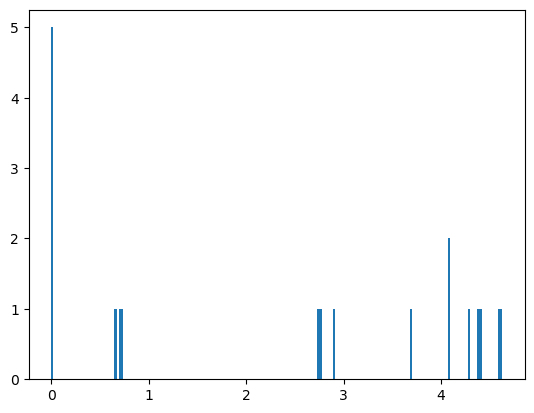

In [46]:
plt.hist(df['band_gap'],bins = 200)
plt.show

In [47]:
df1 = df[df['band_gap']==0]
df1

,nsites,elements,nelements,composition,composition_reduced,formula_pretty,formula_anonymous,chemsys,volume,density,...,weighted_surface_energy,weighted_work_function,surface_anisotropy,shape_factor,has_reconstructed,possible_species,has_props,theoretical,database_IDs,fields_not_requested
0,40,"[As, La, Si]",3,"(La, Si, As)","(La, Si, As)",LaSiAs3,ABC3,As-La-Si,959.652160,5.423013,...,None,None,None,None,None,"[As2-, Si4+, La3+, As3-]","[HasProps.substrates, HasProps.provenance, Has...",False,"{icsd: ['icsd-39160', 'icsd-68204']}",[]
1,40,"[As, La, Si]",3,"(La, Si, As)","(La, Si, As)",LaSiAs3,ABC3,As-La-Si,983.711497,5.290378,...,None,None,None,None,None,"[As2-, La3+, Si4+, As3-]","[HasProps.xas, HasProps.dos, HasProps.magnetis...",False,{icsd: ['icsd-68205']},[]
3,5,"[Au, Br, Cs]",3,"(Cs, Au, Br)","(Cs, Au, Br)",CsAuBr3,ABC3,Au-Br-Cs,163.895426,5.770854,...,None,None,None,None,None,"[Au2+, Cs+, Br-]","[HasProps.electronic_structure, HasProps.therm...",True,{},[]
5,5,"[Au, Br, Rb]",3,"(Rb, Au, Br)","(Rb, Au, Br)",RbAuBr3,ABC3,Au-Br-Rb,160.722102,5.394681,...,None,None,None,None,None,"[Rb+, Au2+, Br-]","[HasProps.bandstructure, HasProps.oxi_states, ...",True,{},[]
18,10,"[Br, Co, Cr]",3,"(Cr, Co, Br)","(Cr, Co, Br)",CrCoBr3,ABC3,Br-Co-Cr,258.140292,4.511141,...,None,None,None,None,None,"[Cr2+, Co+, Br-]","[HasProps.electronic_structure, HasProps.therm...",True,{pf: ['pf-6409']},[]


In [49]:
len(df)

19